In [0]:
import numpy as np
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [119]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
batch_size = 32
print(device)

cuda:0


In [120]:
trainset = torchvision.datasets.MNIST(root='./data', download=True, train=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
print(len(trainloader))


1875


In [16]:
for data in trainloader:
  images,labels = data
  print(images.shape)
  print(labels[0].item())
  break

torch.Size([32, 1, 28, 28])
4


In [0]:
def imshow(img):
  plt.figure(figsize = (4,4))
  img = np.transpose(img.numpy(),(1,2,0)) #(1,28,28) -> (28,28,1)
  img = np.squeeze(img)                   #(28,28,1) -> (28,28)
  print(img.shape)
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  
  
  

(28, 28)


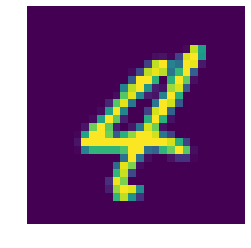

In [45]:
imshow(images[0])

(122, 242, 3)


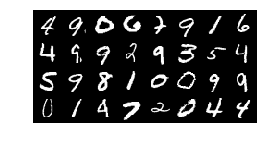

In [46]:
imshow(torchvision.utils.make_grid(images))

In [0]:
class MyNet(nn.Module):
  def __init__(self):
    super(MyNet, self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(784,100),          # 28*28 = 784
        nn.LeakyReLU(),
        nn.Linear(100,50),
        nn.LeakyReLU(),
        nn.Linear(50,10)
    )
    
    
  def forward(self,x):
    x = x.view(x.size(0),-1)
    x = self.classifier(x)
    
    return x

In [91]:
torch.Tensor(images[0].numpy().ravel()).shape

torch.Size([784])

In [0]:
def evaluation(model,dataloader):
  total,correct = 0,0
  for data in dataloader:
    images, labels = data
    images, labels = images.to(device),labels.to(device)
    out = model(images)
    val,ind = torch.max(out,1)
    correct += (ind==labels).sum().item()
    total += labels.size(0)
  print('correct predictions: ',correct)
  print('total images: ',total)
  
  return 'total accuracy : '+str(round(100*(correct/total),2))+' %'

In [0]:
net = MyNet()
out = net(images)

In [0]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(net.parameters(),lr=0.0001)

tensor(0.1875, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.1415, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.1393, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.1741, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.1543, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.2034, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.0634, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.0836, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.1209, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.5811, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.1682, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.1685, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.1060, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.0713, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.0530, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.1302, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.1848, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.0443, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.1062, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.1661, device='cuda:0', grad_fn=<NllLossBackward>)


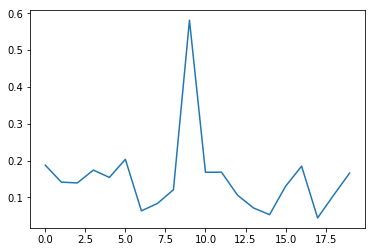

In [122]:
loss_arr = []
net.to(device)
max_epochs = 20
for i in tqdm_notebook(range(max_epochs), total=max_epochs, unit='epoch'):
  
  for data in tqdm_notebook(trainloader,total=len(trainloader), unit='batch'):
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    outputs = net(images)

    opt.zero_grad()
    loss = loss_fn(outputs,labels)

    loss.backward()
    opt.step()

    del images,labels,outputs
  print(loss)
  loss_arr.append(loss)


  
plt.plot(loss_arr)
plt.show()
  

In [138]:
evaluation(net,trainloader)

correct predictions:  57067
total images:  60000


'total accuracy : 95.11 %'